In [0]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('creditcard.csv')

In [5]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print(data.shape)

(284807, 31)


In [7]:
print(data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [20]:
data = data.sample(frac = 0.5 , random_state = 1)

print(data.shape)

(14240, 31)


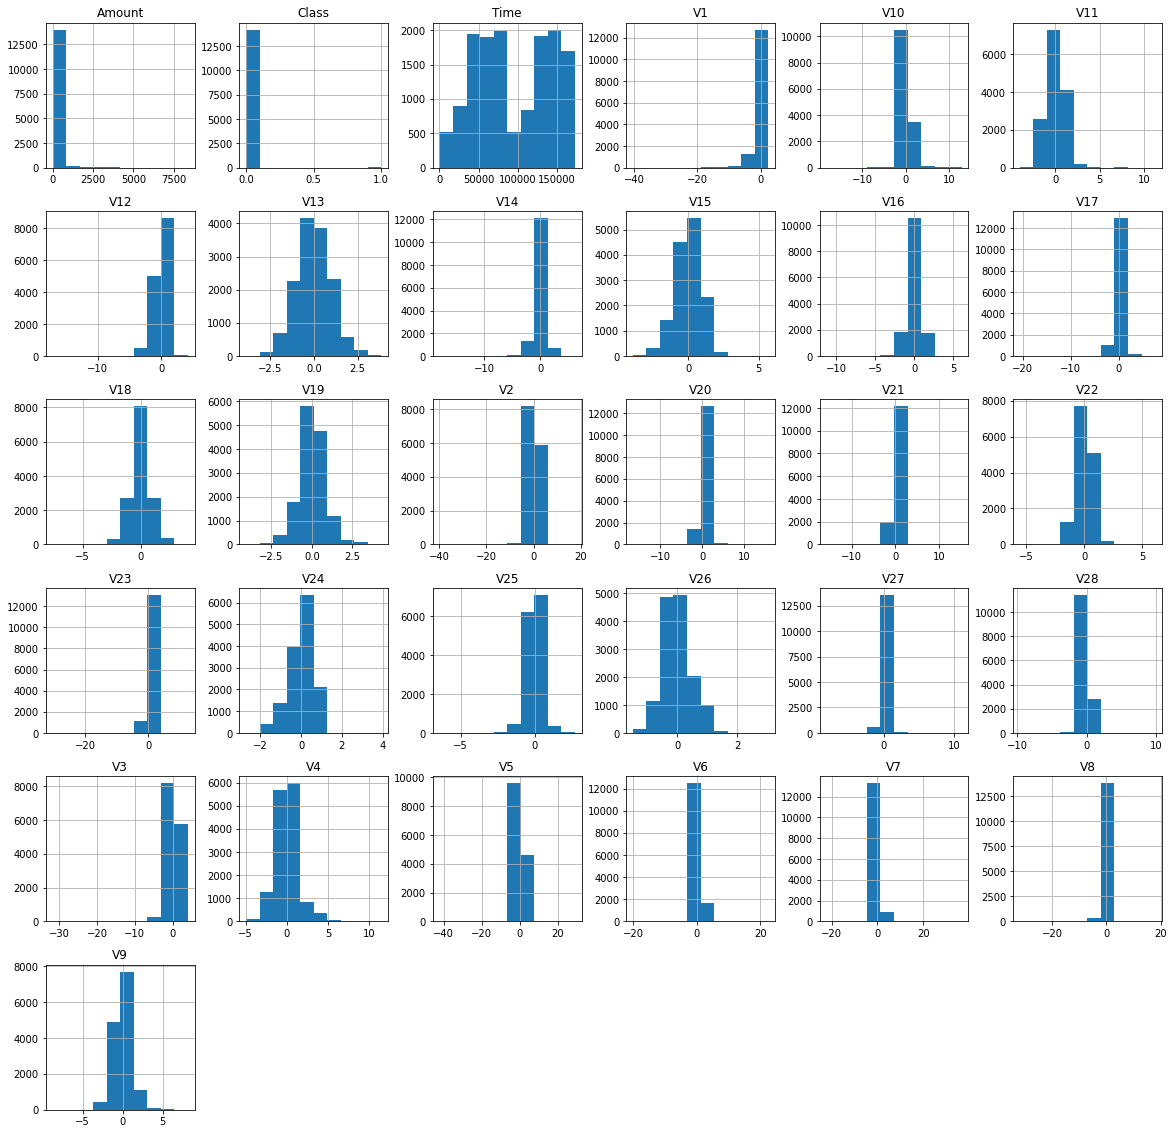

In [21]:
#plot histogram
data.hist(figsize = (20,20))
plt.show()

In [22]:
#determine number of fraudulant case in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float (len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017587055926837848
Fraud Cases: 25
Valid Cases: 14215


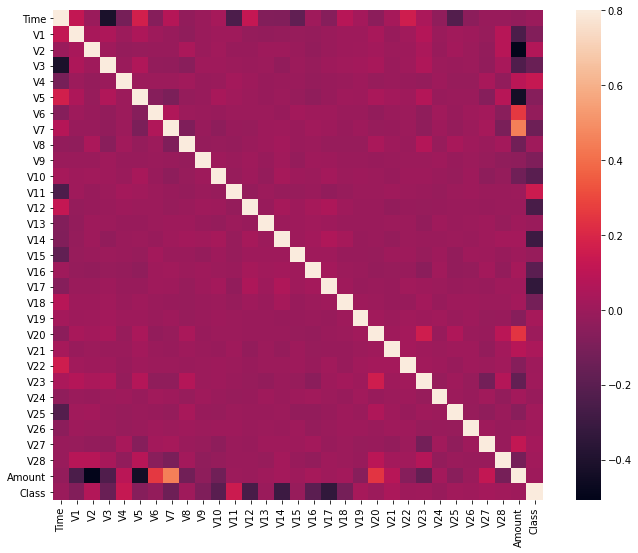

In [23]:
cormat = data.corr()

fig = plt.figure(figsize = (12,9))
sns.heatmap(cormat,vmax = .8, square = True)
plt.show()

In [25]:
#Get all the columns from the dataframe
columns = data.columns.tolist()

#Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

#store the variable to predict on
target = "Class"

x = data[columns]
y = data[target]

#print the shape of x and y
print(x.shape)
print(y.shape)

(14240, 30)
(14240,)


In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random sate
state = 1

#define outlier method

classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(x),
                                        contamination = outlier_fraction,
                                        random_state = state),
     "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20,
                                                contamination = outlier_fraction)
}

In [27]:
#fit the model
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

  #fit the data and tag outliers
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(x)
    score_pred = clf.negative_outlier_factor_
  else:
    clf.fit(x)
    scores_pred = clf.decision_function(x)
    y_pred = clf.predict(x)
  
  #Reshape the prediction values to 0 for valid and 1 for fraud
  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1

  n_errors = (y_pred != y).sum()

  #Run classification metrics
  print('{}: {}'.format(clf_name, n_errors))
  print(accuracy_score(y,y_pred))
  print(classification_report(y,y_pred))

Isolation Forest: 39
0.9972612359550562
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14215
           1       0.23      0.24      0.24        25

    accuracy                           1.00     14240
   macro avg       0.61      0.62      0.62     14240
weighted avg       1.00      1.00      1.00     14240

Local Outlier Factor: 51
0.9964185393258427
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14215
           1       0.00      0.00      0.00        25

    accuracy                           1.00     14240
   macro avg       0.50      0.50      0.50     14240
weighted avg       1.00      1.00      1.00     14240

